# Assignment 1 - Advance Data Science


Name - Viral Jangale

NUID: 002654463

# Sentiment Analysis in Python

Sentiment analysis, also known as opinion mining, is a natural language processing (NLP) technique that involves determining the sentiment or emotional tone of a piece of text. In Python, we can perform sentiment analysis using various libraries and tools.
In this notebook we will be doing some sentiment analysis in python using these following techniques:
1. VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
2. Roberta Pretrained Model from 🤗
3. Huggingface Pipeline
4. TextBlob

#Problem Statement

Determining the sentiment or emotional tone of a piece of text can be difficult due to the inherent complexities of human language and communication. Text often carries subtle nuances, sarcasm, or irony that can be challenging to detect algorithmically. Additionally, negations and cultural variations can completely change the meaning and sentiment of a sentence. Subjectivity plays a significant role, as individuals may interpret text differently based on their personal experiences and perspectives. Furthermore, sentiment analysis often involves fine-grained analysis to capture mixed sentiments or assess sentiments within specific contexts. Real-world text data is noisy and may lack explicit tone indicators, adding to the complexity.

To accurately determine sentiment, models must not only analyze the text but also understand the broader context, including entities mentioned and previous statements. The dynamic nature of language, evolving with time and the emergence of new expressions, further complicates sentiment analysis. As a result, achieving high accuracy in sentiment analysis remains a continual challenge, requiring robust algorithms and ongoing model refinement to handle diverse and nuanced text data effectively.

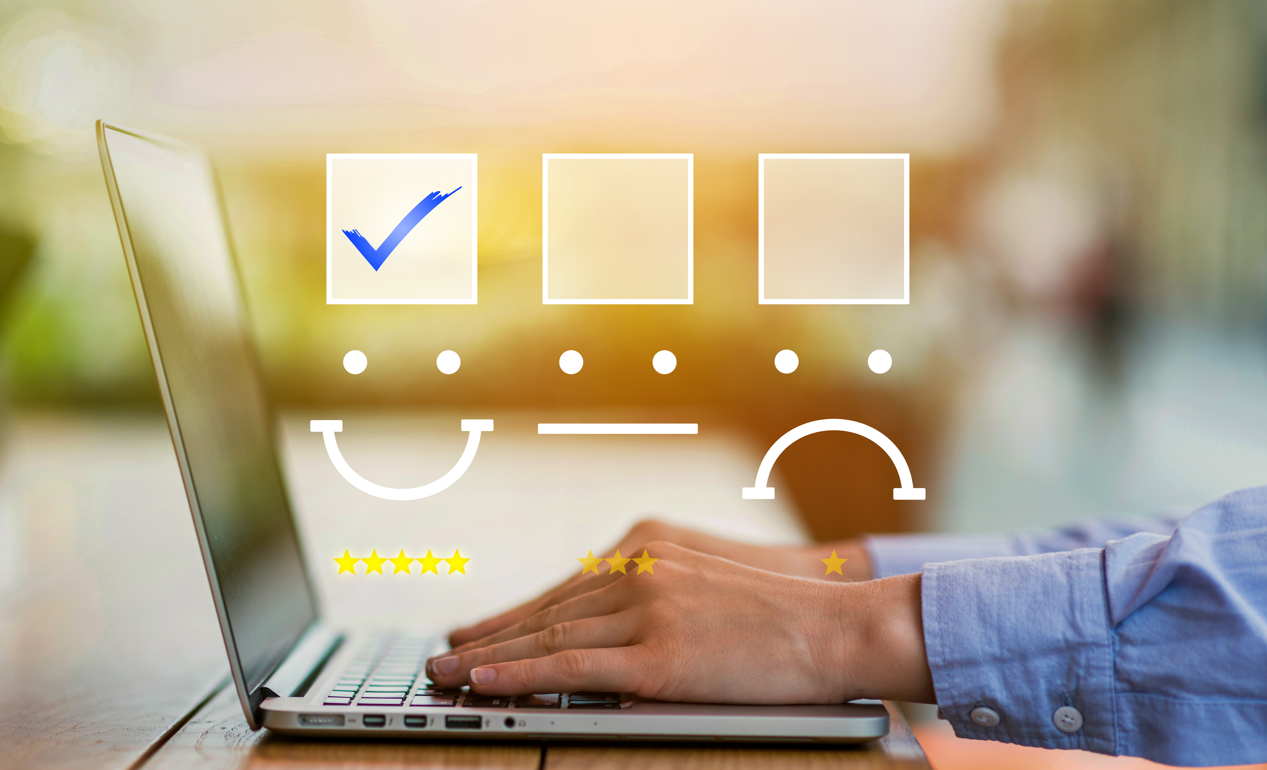

The problem statement for this project is to develop and compare sentiment analysis classifiers using two distinct approaches: NLTK's VADER sentiment analysis and Huggingface's RoBERTa Transformers. The objective is to assess the differences in the sentiment predictions produced by these two models when applied to Amazon customer reviews. The project aims to evaluate the effectiveness and accuracy of these sentiment analysis tools in the context of real-world, user-generated content. Sentiment analysis is a critical tool for data scientists, and this project seeks to provide insights into the performance and reliability of different sentiment analysis techniques, thereby enhancing the understanding and application of sentiment analysis in language modeling tasks.

#Assignment Question/Answers


### What is the question being researched?
- Can we create an effective Sentiment Analysis classifier for Amazon customer reviews using Natural Language Processing techniques and comparing the performance of NLTK's VADER and Huggingface Roberta Transformers?

### Why is it interesting?
- It is interesting due to its practicality, as it addresses real-world sentiment analysis challenges. The study explores the strengths and limitations of these NLP tools, contributing to improved language modeling. It also analyzes real Amazon customer reviews, offering insights valuable for businesses and decision-making.
Moreover, the research delves into the impact of sentiment analysis on language modeling and its implications for understanding human language more comprehensively. By examining the accuracy of sentiment analysis tools, the study can contribute to the improvement of NLP models and their ability to handle nuances in language, such as sarcasm and irony.

### What is the theory behind it?
- Natural Language Processing (NLP): The project is grounded in the theoretical foundations of NLP, which is a field of artificial intelligence focused on enabling computers to understand and generate human language. NLP encompasses a range of techniques, including text analysis, language modeling, and sentiment analysis.

- Sentiment Analysis: The core theoretical concept here is sentiment analysis, which involves the use of computational techniques to determine the sentiment or emotional tone expressed in text data. The project aims to create a sentiment analysis classifier for Amazon customer reviews, which is a classic use case for sentiment analysis.

- NLTK's VADER: NLTK (Natural Language Toolkit) is a widely-used Python library for NLP, and VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool provided by NLTK. The project leverages VADER as one of the sentiment analysis tools. The theoretical foundation of VADER includes sentiment lexicons and grammatical rules to assess sentiment in text.

- Huggingface Roberta Transformers: Hugging Face is known for providing state-of-the-art pre-trained transformer-based models for various NLP tasks. The project uses Huggingface's Roberta Transformers, which are deep learning models based on the transformer architecture. The theoretical basis for using these models lies in their ability to capture complex contextual information in text.

- Comparison of Model Outputs: The project intends to compare the outputs of NLTK's VADER and Huggingface's Roberta Transformers. This involves assessing the theoretical underpinnings of both tools and understanding how they approach sentiment analysis differently. The comparison can shed light on the strengths and weaknesses of different sentiment analysis approaches.

- Sentiment Analysis in Language Modeling: The text mentions that sentiment analysis is an important tool for data scientists to use in language modeling. This indicates an understanding of the relationship between sentiment analysis and broader language modeling tasks. Sentiment analysis can be used as a component of language models to make them more contextually aware.

- In summary, the project described in the text is situated within the theoretical framework of NLP and sentiment analysis. It aims to leverage specific tools (NLTK's VADER and Huggingface's Roberta Transformers) to analyze sentiment in Amazon customer reviews, compare their outputs, and recognize the importance of sentiment analysis in language modeling and data science applications. While the text provides a high-level overview, the actual implementation and analysis would involve more detailed theoretical considerations and practical techniques.







### Results, data, and tables?
- Results are the findings obtained from an analysis, data is the raw information used for analysis, and tables are a format for presenting data or results in an organized manner. Together, these elements contribute to the communication of research findings and insights.We will find all of this as we go through this notebook.

# Step 0. Read in Data and NLTK Basics
Reading in data and using NLTK (Natural Language Toolkit) for basic text processing and analysis is a common task in natural language processing (NLP) and text mining.

In [ ]:
#Importing files and NLTK downloading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
plt.style.use('ggplot')
nltk.download('all')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package 

True

We can read in text data from various sources, such as files, databases, or web scraping. Here, we are reading in with the help of github.

In [ ]:
# Read in data
df = pd.read_csv('https://raw.githubusercontent.com/Viral-28/ADS/main/AmazonReviews.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(49999, 10)
(500, 10)


We have read in a dataset from a CSV file using Pandas and then selected the first 500 rows of the DataFrame.

Read the data from a CSV file hosted on GitHub using the pd.read_csv() function.
Then the shape of the original DataFrame was printed to check its dimensions.
We selected the first 500 rows of the DataFrame using .head(500) and printed the shape of the DataFrame after selecting the first 500 rows to confirm the subset size.
By performing these steps, we have loaded a dataset into a Pandas DataFrame and limited it to the first 500 rows. This can be useful for initial exploration and analysis of a large dataset or for working with a smaller subset of data when the entire dataset is not needed for your analysis.

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1.0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2.0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3.0,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4.0,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5.0,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


##Quick EDA
Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. It involves investigating and summarizing the main characteristics, patterns, and relationships in your dataset using various statistical and visualization techniques. Let's go through some common steps and techniques for conducting EDA on your dataset

We have an image depicting a dataframe and a list of features. We will utilize the 'text' feature as input and consider the 'score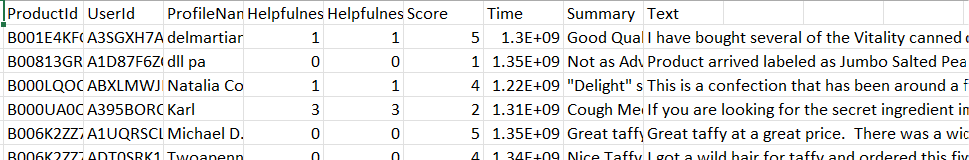' feature as our target variable. Our goal is to predict the likelihood of a text being categorized as positive, negative, or neutral

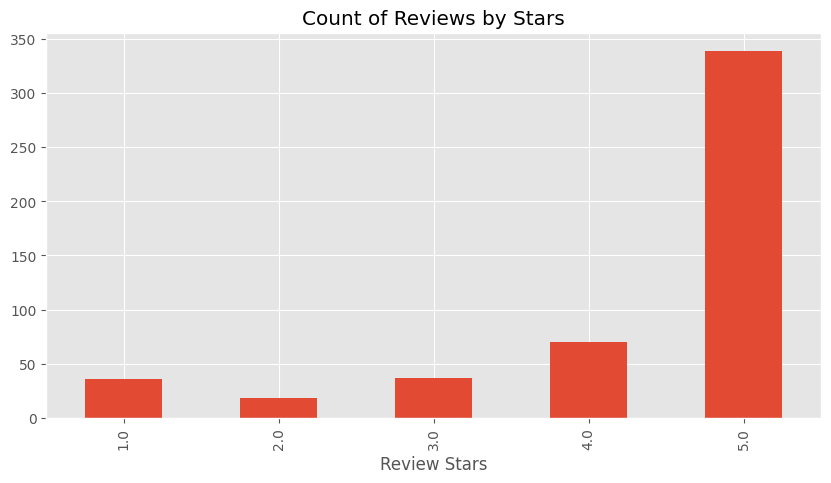

In [ ]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

We have used Matplotlib to create a bar plot to visualize the count of reviews by their star ratings (from a column named 'Score') in our Pandas DataFrame. Here's a breakdown of what our code is doing:

df['Score'].value_counts(): This part calculates the count of unique values in the 'Score' column, which represents the star ratings. It returns a Series with the counts, and the index of the Series contains the unique star ratings.

.sort_index(): After obtaining the counts, you sort them by their index (in this case, by star rating). This ensures that the data is plotted in ascending order of star ratings.

.plot(kind='bar', title='Count of Reviews by Stars', figsize=(10, 5)): This part creates a bar plot using Matplotlib with the sorted data. It sets the title of the plot as 'Count of Reviews by Stars' and specifies the figure size as (10, 5) for better visibility.

ax.set_xlabel('Review Stars'): This line sets the label for the x-axis, indicating that the x-axis represents the review stars.

plt.show(): Finally, this line displays the plot.

##NLTK
NLTK (Natural Language Toolkit) is a powerful Python library for working with human language data, primarily focusing on natural language processing (NLP) and text analysis. It provides tools, resources, and libraries for various NLP tasks. NLTK (Natural Language Toolkit) operations involve text preprocessing and analysis tasks, such as tokenization.

In [ ]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


Here we're trying to access and print a specific text example from a DataFrame (df) using the column name 'Text' and the index 50. This code assumes that you have a DataFrame with a column named 'Text' that contains textual data, and you want to retrieve and print the text in the 50th row.
This code will retrieve the text in the 'Text' column for the 50th row of your DataFrame and then print it to the console. Make sure that the DataFrame and column names match your specific dataset structure.



In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

We're using NLTK to tokenize a text example stored in the variable example. Tokenization is the process of splitting a text into individual words or tokens. Our code tokenizes the example text and then prints the first 10 tokens.

In this code, NLTK's word_tokenize() function is used to split the example text into individual words or tokens, and tokens[:10] is used to print the first 10 tokens from the list. This can be helpful for analyzing and processing the text data further.






In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

We're using NLTK to perform part-of-speech (POS) tagging on a list of tokens obtained from your example text. POS tagging assigns a part-of-speech label (e.g., noun, verb, adjective) to each word in the text.

In this code, nltk.pos_tag() is used to tag each token in the tokens list with its corresponding part-of-speech label. tagged[:10] is used to print the POS tags for the first 10 tokens in the list. The output will show pairs of words and their associated POS tags, which represent the grammatical category of each word in the text.

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


We're using NLTK to perform named entity recognition (NER) and print the results using the nltk.chunk.ne_chunk() function. Named entity recognition is the task of identifying named entities (such as names of people, organizations, locations, etc.) in text.

In this code, nltk.chunk.ne_chunk() is used to perform named entity recognition on the tagged tokens in the tagged list. The .pprint() method is then used to print the recognized named entities along with their corresponding labels.

The output will display named entities within the text and assign labels like 'PERSON' (for names of people), 'ORGANIZATION' (for names of organizations), 'GPE' (for geopolitical entities like countries or cities), and more.

# Step 1. VADER Seniment Scoring
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically designed to analyze sentiment in text, especially in social media data. It provides a pre-built sentiment lexicon with sentiment scores for words and emoticons, as well as rules for interpreting sentiment in context.

We will use NLTK's `SentimentIntensityAnalyzer` to get the neg/neu/pos scores of the text.

- This uses a "bag of words" approach:
    1. Stop words are removed
    2. each word is scored and combined to a total score.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

We've imported the SentimentIntensityAnalyzer class from the nltk.sentiment module and initialized it as sia. This is a correct step to use the SentimentIntensityAnalyzer from the NLTK library for sentiment analysis.
We can now use the sia object to analyze the sentiment of text data.
The tqdm library is used to create a progress bar for the sentiment analysis loop, which can be helpful when processing a large amount of text data.

In [ ]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

The sia.polarity_scores() method from the SentimentIntensityAnalyzer class in NLTK is used to analyze the sentiment of a text sentence and return a dictionary of sentiment scores.

Here's what each of these scores means:
neg (Negative sentiment score): 0.0
neu (Neutral sentiment score): 0.11
pos (Positive sentiment score): 0.89
compound (Compound sentiment score): 0.6114
In this case, the sentence is overwhelmingly positive, as indicated by the high positive score and the positive compound score. The compound score is a combined score that takes into account both positive and negative sentiments, with values ranging from -1 (most negative) to 1 (most positive).






In [ ]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

We analyze the sentence "This is the worst thing ever." using the sia.polarity_scores() method from the SentimentIntensityAnalyzer class in NLTK, we will get sentiment scores for the text.

In [ ]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [ ]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

We are running sentiment analysis using the sia.polarity_scores() method from the SentimentIntensityAnalyzer on the entire dataset (df). In our code, we are iterating through each row in the DataFrame, extracting the 'Text' column, and applying sentiment analysis to each text.

Here's a summary of what our code is doing:

We create an empty dictionary res to store the sentiment scores for each text.

We iterate through each row in the DataFrame df using df.iterrows(). For each row:

We extract the 'Text' and 'Id' columns from that row.
We apply sentiment analysis using sia.polarity_scores(text) to calculate sentiment scores for the 'Text'.
We store the sentiment scores in the res dictionary with the 'Id' as the key.
This code will result in a dictionary (res) where each 'Id' corresponds to its sentiment scores.

After running this code, we can access the sentiment scores for a specific 'Id' by using res[myid], where myid is the 'Id' of the text you are interested in.

Running sentiment analysis on a large dataset may take some time, depending on the size of the dataset and the complexity of the text processing involved.

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

We are continuing to process the sentiment analysis results and merge them with our original DataFrame (df). Here's a breakdown of our code:

vaders = pd.DataFrame(res).T: We create a new DataFrame vaders from the sentiment analysis results (res) and transpose it (.T) so that the 'Id' values become row labels.

vaders = vaders.reset_index().rename(columns={'index': 'Id'}): We reset the index of the vaders DataFrame and rename the 'index' column to 'Id'. This step is often necessary after transposing to ensure that 'Id' remains a column.

vaders = vaders.merge(df, how='left'): We merge the vaders DataFrame with the original df DataFrame using a left join (how='left'). This operation joins the two DataFrames based on a common column (likely 'Id' in this case), and the result contains all rows from the left DataFrame (vaders) and the matching rows from the right DataFrame (df).

The merged DataFrame (vaders) should now contain sentiment analysis scores along with the original data from your df DataFrame, allowing you to analyze the sentiment of each text in the context of the original dataset.


In [ ]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1.0,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2.0,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3.0,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4.0,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5.0,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


## Plot VADER results

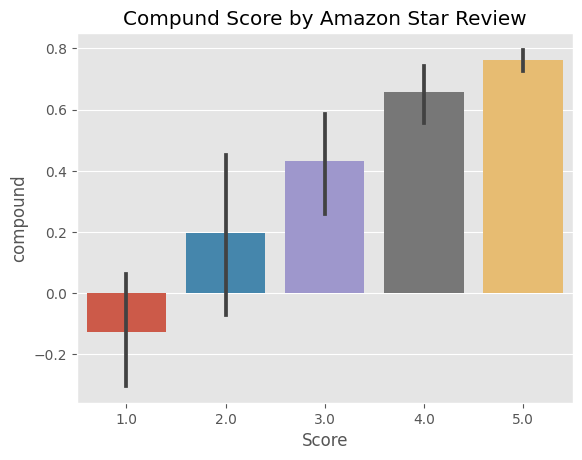

In [ ]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

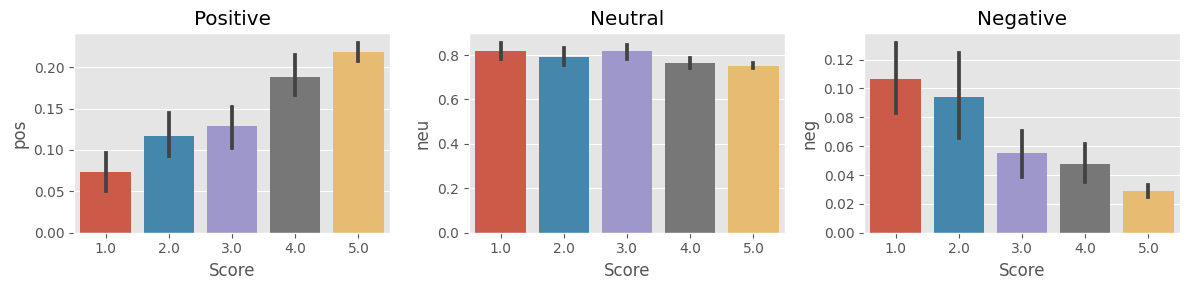

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Using Python's Matplotlib and Seaborn libraries we are creating a bar plot with subplots. Here's a breakdown of what this code is doing:

1. `fig, axs = plt.subplots(1, 3, figsize=(12, 3))`: This line of code initializes a Matplotlib figure (`fig`) with three subplots arranged in a single row (`1`) and three columns (`3`). It also specifies the figure size as 12 units in width and 3 units in height. The `axs` variable will hold references to the individual subplots.

2. `sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])`: This line creates a bar plot in the first subplot (`axs[0]`) using Seaborn's `barplot` function. It uses data from the `vaders` DataFrame, where 'Score' is on the x-axis, and 'pos' (positive sentiment scores) is on the y-axis.

3. `sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])`: This line creates a bar plot in the second subplot (`axs[1]`) with 'Score' on the x-axis and 'neu' (neutral sentiment scores) on the y-axis.

4. `sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])`: This line creates a bar plot in the third subplot (`axs[2]`) with 'Score' on the x-axis and 'neg' (negative sentiment scores) on the y-axis.

5. `axs[0].set_title('Positive')`, `axs[1].set_title('Neutral')`, `axs[2].set_title('Negative')`: These lines set titles for each subplot to label them as "Positive," "Neutral," and "Negative," respectively.

6. `plt.tight_layout()`: This command adjusts the spacing between subplots for better readability.

7. `plt.show()`: This command displays the entire figure with the three subplots, showing the bar plots for positive, neutral, and negative sentiment scores side by side.

In summary, this code creates a figure with three subplots, each containing a bar plot that visualizes the sentiment scores (positive, neutral, and negative) for different 'Score' categories. The subplots are arranged horizontally for easy comparison.

# Step 3. Roberta Pretrained Model
Roberta is a state-of-the-art pre-trained language model used in natural language processing (NLP). It's based on the transformer architecture and is designed for various NLP tasks. Roberta stands out for its robustness and optimization in pretraining on large text corpora, making it a powerful tool for tasks like text classification, sentiment analysis, and more. It's known for achieving high performance in a wide range of NLP applications.

- Use a model trained of a large corpus of data.
- Transformer model accounts for the words but also the context related to other words.

In [ ]:
!pip install transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.8 MB/s eta 0:00:00


In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

By running these lines of code, we have loaded both the tokenizer and the pre-trained sentiment analysis model, which are now ready to be used for sentiment analysis tasks. We can use the tokenizer to preprocess text data and the model to make predictions on the sentiment of text sequences.

In [ ]:
# VADER results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [ ]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687476, 'roberta_pos': 0.002957372}


In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83.0
Broke for id 187.0


The code snippet is a Python loop that iterates through rows of a DataFrame (`df`) to perform sentiment analysis using both VADER (Valence Aware Dictionary and sEntiment Reasoner) and a RoBERTa-based sentiment analysis model. Here's a breakdown of what this code does:

1. `res = {}`: You initialize an empty dictionary called `res` to store the sentiment analysis results.

2. `for i, row in tqdm(df.iterrows(), total=len(df)):`: This loop iterates through each row of the DataFrame `df` using the `iterrows()` method. The `tqdm` function is used to display a progress bar.

3. `try:`: You wrap the code inside a `try` block to handle potential exceptions.

4. `text = row['Text']` and `myid = row['Id']`: You extract the 'Text' and 'Id' columns from the current row of the DataFrame. 'Text' likely contains the text data to be analyzed, and 'Id' is used to identify each entry.

5. `vader_result = sia.polarity_scores(text)`: You use NLTK's VADER (`sia`) to perform sentiment analysis on the 'text' using the `polarity_scores()` method. This computes sentiment scores using VADER and stores them in the `vader_result` dictionary.

6. `vader_result_rename = {}` and the following loop: You create a new dictionary (`vader_result_rename`) to rename the keys in the `vader_result` dictionary by adding a "vader_" prefix to each key. This is done to distinguish VADER results from RoBERTa results.

7. `roberta_result = polarity_scores_roberta(text)`: You call a function `polarity_scores_roberta()` (not shown in the provided code) to perform sentiment analysis using a RoBERTa-based model on the 'text' data. This computes sentiment scores using RoBERTa and stores them in the `roberta_result` dictionary.

8. `both = {**vader_result_rename, **roberta_result}`: You combine the renamed VADER results (`vader_result_rename`) and the RoBERTa results (`roberta_result`) into a single dictionary called `both`.

9. `res[myid] = both`: You store the combined results (`both`) in the `res` dictionary, where the 'Id' (`myid`) serves as the key.

10. `except RuntimeError:`: This block catches any `RuntimeError` exceptions that might occur during the execution of the code and prints a message indicating that an exception occurred.

In summary, this code processes each row of the DataFrame `df`, performs sentiment analysis using both VADER and a RoBERTa-based model, combines the results into a dictionary, and stores them in the `res` dictionary with the 'Id' as the key. Any runtime errors that occur during the process are handled and logged.

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

## Compare Scores between models
To compare the sentiment scores generated by the VADER and RoBERTa sentiment analysis models, several methods can be employed. Firstly, by calculating summary statistics such as mean and median for each model's scores, one can gain insights into the central tendencies of their results. Visualizing the distribution of scores through histograms or density plots offers a way to directly compare the shape and spread of the data produced by both models.

Moreover, calculating the correlation between the scores provides a measure of their similarity or dissimilarity. Scatter plots can be used to visualize how scores from one model relate to those from the other. Statistical tests, like t-tests or Mann-Whitney U tests, can determine whether observed differences in scores are statistically significant.


In [ ]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

# Step 3. Combine and compare

To combine and compare sentiment analysis results from various models, collect scores, standardize them, and visualize the differences. Use statistical tests for agreement assessment and qualitative analysis for strengths/weaknesses. Choose the best model based on analysis goals and set decision thresholds for classification. Iterate for improvement, validate, and gain insights into text sentiment.

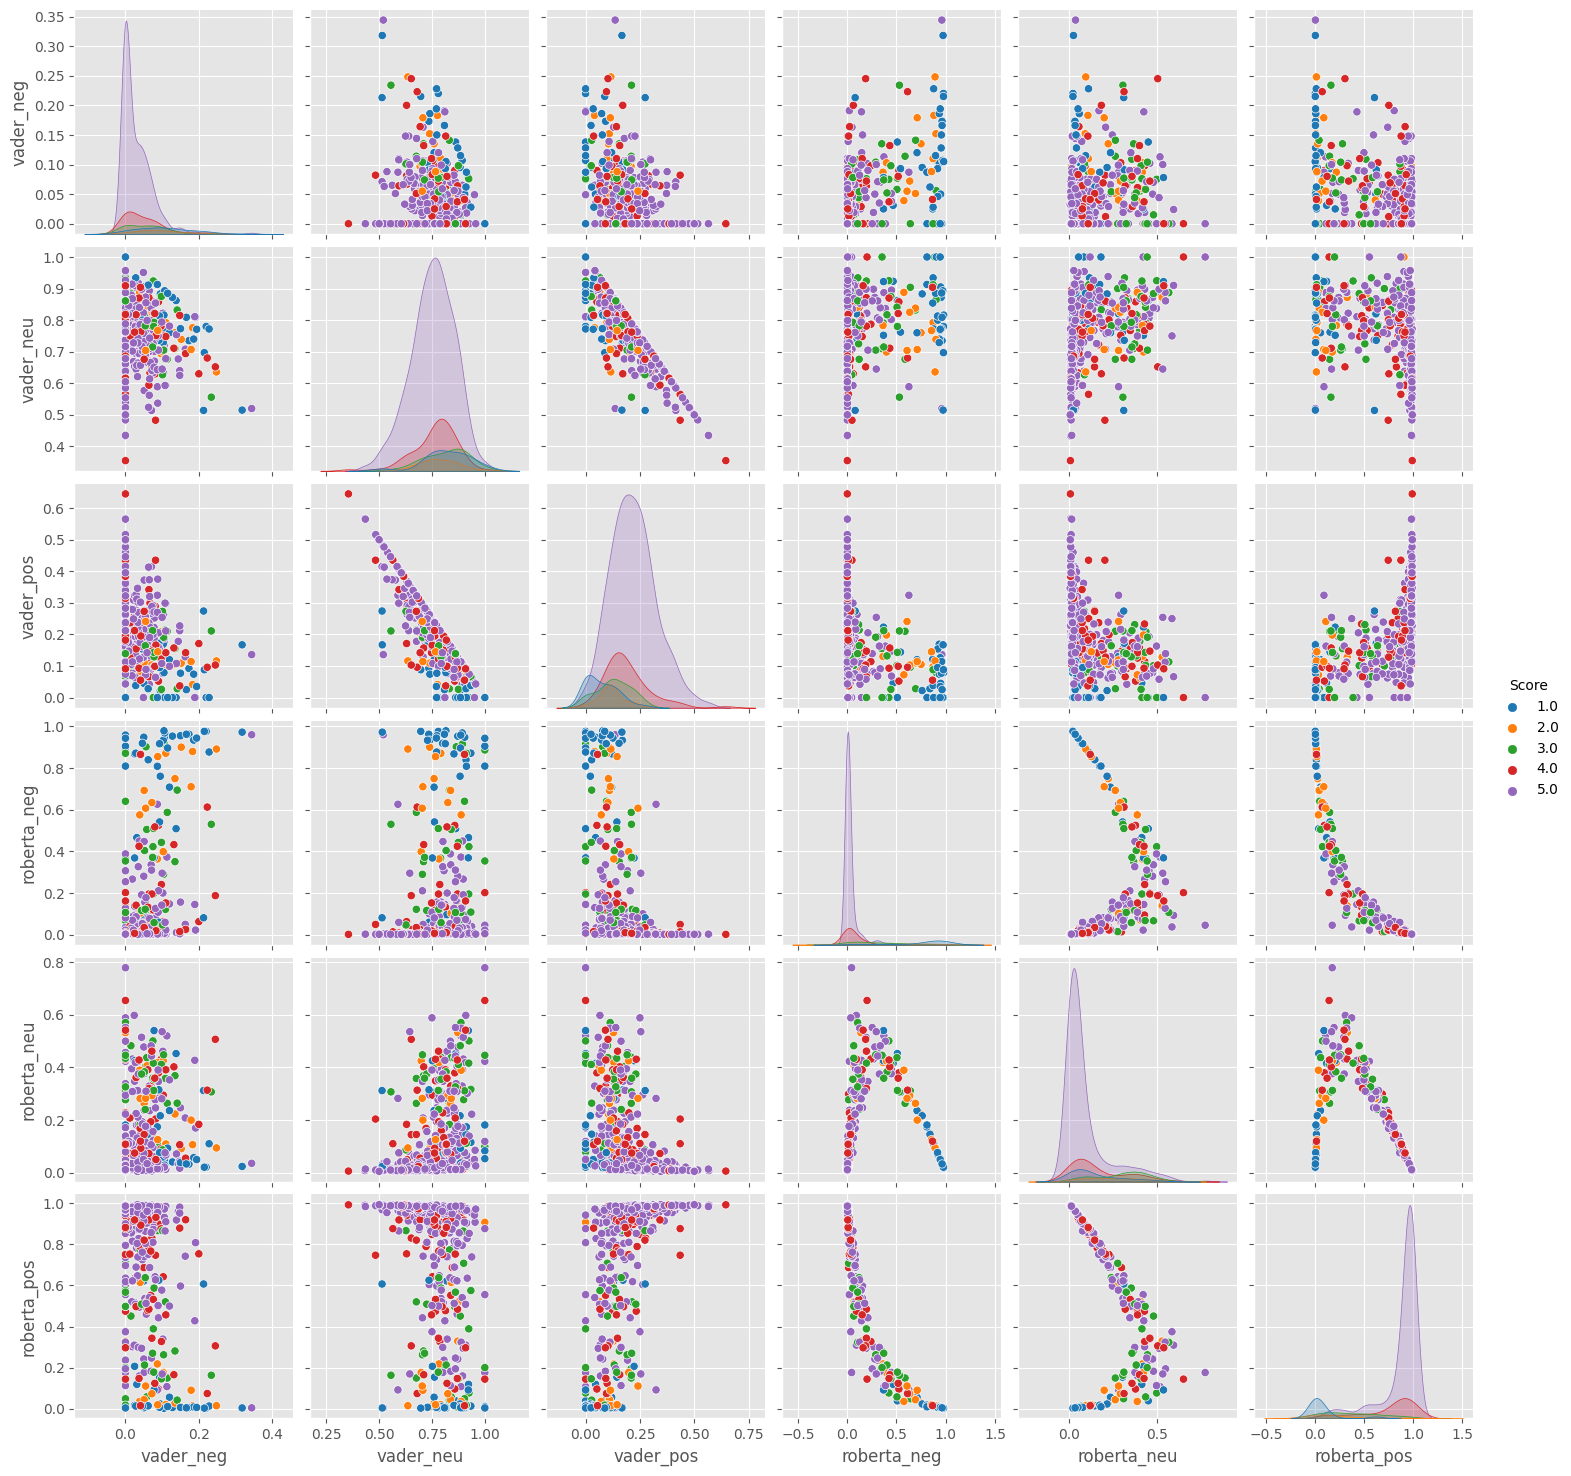

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

# Step 4: Review Examples:

- Positive 1-Star and Negative 5-Star Reviews

Lets look at some examples where the model scoring and review score differ the most.

In [ ]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [ ]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [ ]:
# nevative sentiment 5-Star view

In [ ]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [ ]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

# Extra: The Transformers Pipeline
- Quick & easy way to run sentiment predictions

The Transformers pipeline, built on state-of-the-art transformer-based models, streamlines natural language processing tasks by offering a unified interface. It encompasses tasks like text classification, named entity recognition, translation, summarization, and more. Users can easily load pre-trained models, tokenize text, and make predictions with minimal code, making it a versatile and efficient tool for a wide range of NLP applications.

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [ ]:
sent_pipeline('Make sure to code everyday!')

[{'label': 'POSITIVE', 'score': 0.9991742968559265}]

In [ ]:
sent_pipeline('This was a nice assignment')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]

#TextBlob

TextBlob is a user-friendly Python library for natural language processing and sentiment analysis. It simplifies tasks like part-of-speech tagging, translation, sentiment scoring, and more. With its straightforward API, TextBlob is popular for quick text analysis and is often used for educational purposes and prototyping due to its simplicity and ease of use.

In [ ]:
pip install textblob


In [ ]:
from textblob import TextBlob

# Sample text
text = "I hate Mondays."

# Perform sentiment analysis
analysis = TextBlob(text)

# Get sentiment polarity
polarity = analysis.sentiment.polarity

# Interpret sentiment polarity
if polarity > 0:
    print("Positive sentiment")
elif polarity < 0:
    print("Negative sentiment")
else:
    print("Neutral sentiment")


Negative sentiment


It analyzes the sentiment of the sample text "I hate Mondays" and interprets the sentiment polarity. The code calculates the polarity score and categorizes it as positive, negative, or neutral based on the score. In this specific example, the sentiment would likely be classified as "Negative sentiment" because the text expresses a negative opinion about Mondays. TextBlob simplifies sentiment analysis by providing a polarity score that quantifies the sentiment's positivity or negativity.

# Worked example on different dataset

Here I am working on Flipkart reviews dataset.

In [ ]:
# Read in data
df = pd.read_csv('https://github.com/Viral-28/ADS/raw/main/Flipkart_reviews.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(10000, 7)
(500, 7)


In [ ]:
df.head()

,id,product_name,product_price,Rate,Review,Summary,Sentiment
0,9yKzy9PApeiPPOUJEtnvkg,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,5.0,super!,great cooler excellent air flow and for this p...,positive
1,ZRJwVLyzEJq1VAihDhYiow,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,5.0,awesome,best budget 2 fit cooler nice cooling,positive
2,6oRAC4uyJCsJl1X0WZpVSA,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,3.0,fair,the quality is good but the power of air is de...,positive
3,_1QQZuf4zZOyFCvXc0o6Vg,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,1.0,useless product,very bad product its a only a fan,negative
4,6ozycU1RpktNG2-1BroVtw,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,3.0,fair,ok ok product,neutral


#Quick EDA

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()
plt.style.use('ggplot')
plt.show()

#NLTK

In [ ]:
example = df['Review'][50]
print(example)

good not best


In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['good', 'not', 'best']

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('good', 'JJ'), ('not', 'RB'), ('best', 'JJS')]

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S good/JJ not/RB best/JJS)


# Step 1. VADER Seniment Scoring
We will use NLTK's `SentimentIntensityAnalyzer` to get the neg/neu/pos scores of the text.

- This uses a "bag of words" approach:
    1. Stop words are removed
    2. each word is scored and combined to a total score.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [ ]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.463, 'neu': 0.138, 'pos': 0.399, 'compound': -0.12}

In [ ]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review']
    myid = row['id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'id'})
vaders = vaders.merge(df, how='left')

In [ ]:
# Now we have sentiment score and metadata
vaders.head()

,id,neg,neu,pos,compound,product_name,product_price,Rate,Review,Summary,Sentiment
0,9yKzy9PApeiPPOUJEtnvkg,0.000,0.000,1.0,0.6360,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,5.0,super!,great cooler excellent air flow and for this p...,positive
1,ZRJwVLyzEJq1VAihDhYiow,0.000,0.000,1.0,0.6249,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,5.0,awesome,best budget 2 fit cooler nice cooling,positive
2,6oRAC4uyJCsJl1X0WZpVSA,0.000,0.000,1.0,0.3182,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,3.0,fair,the quality is good but the power of air is de...,positive
3,_1QQZuf4zZOyFCvXc0o6Vg,0.737,0.263,0.0,-0.4215,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,1.0,useless product,very bad product its a only a fan,negative
4,6ozycU1RpktNG2-1BroVtw,0.000,0.000,1.0,0.3182,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,3.0,fair,ok ok product,neutral


## Plot VADER results

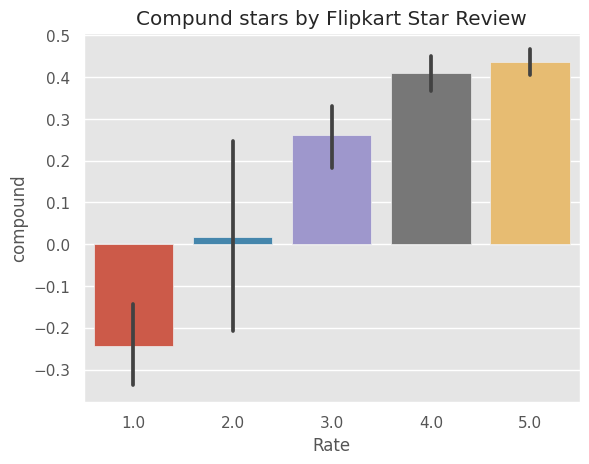

In [ ]:
ax = sns.barplot(data=vaders, x='Rate', y='compound')
ax.set_title('Compund stars by Flipkart Star Review')
plt.show()

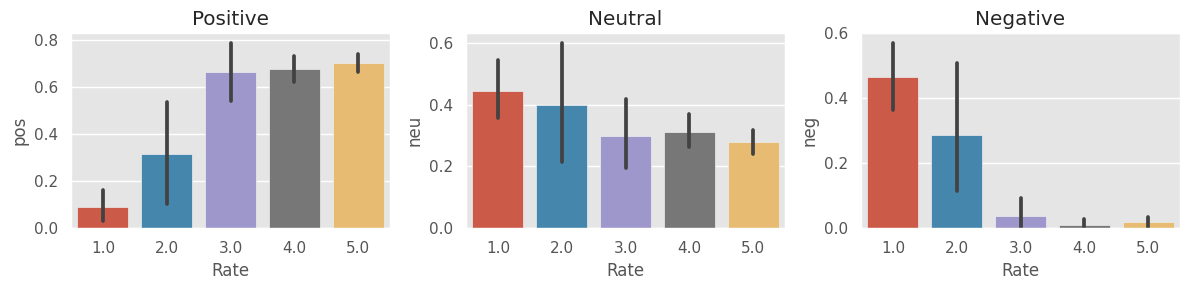

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Rate', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rate', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rate', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Step 3. Roberta Pretrained Model

- Use a model trained of a large corpus of data.
- Transformer model accounts for the words but also the context related to other words.

In [ ]:
!pip install transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.4 MB/s eta 0:00:00


In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
# VADER results on example
print(example)
sia.polarity_scores(example)

good not best


{'neg': 0.463, 'neu': 0.138, 'pos': 0.399, 'compound': -0.12}

In [ ]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.56174326, 'roberta_neu': 0.38722816, 'roberta_pos': 0.051028613}


In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Review']
        myid = row['id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'id'})
results_df = results_df.merge(df, how='left')

## Compare Scores between models

In [ ]:
results_df.columns

Index(['id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'product_name',
       'product_price', 'Rate', 'Review', 'Summary', 'Sentiment'],
      dtype='object')

# Step 3. Combine and compare

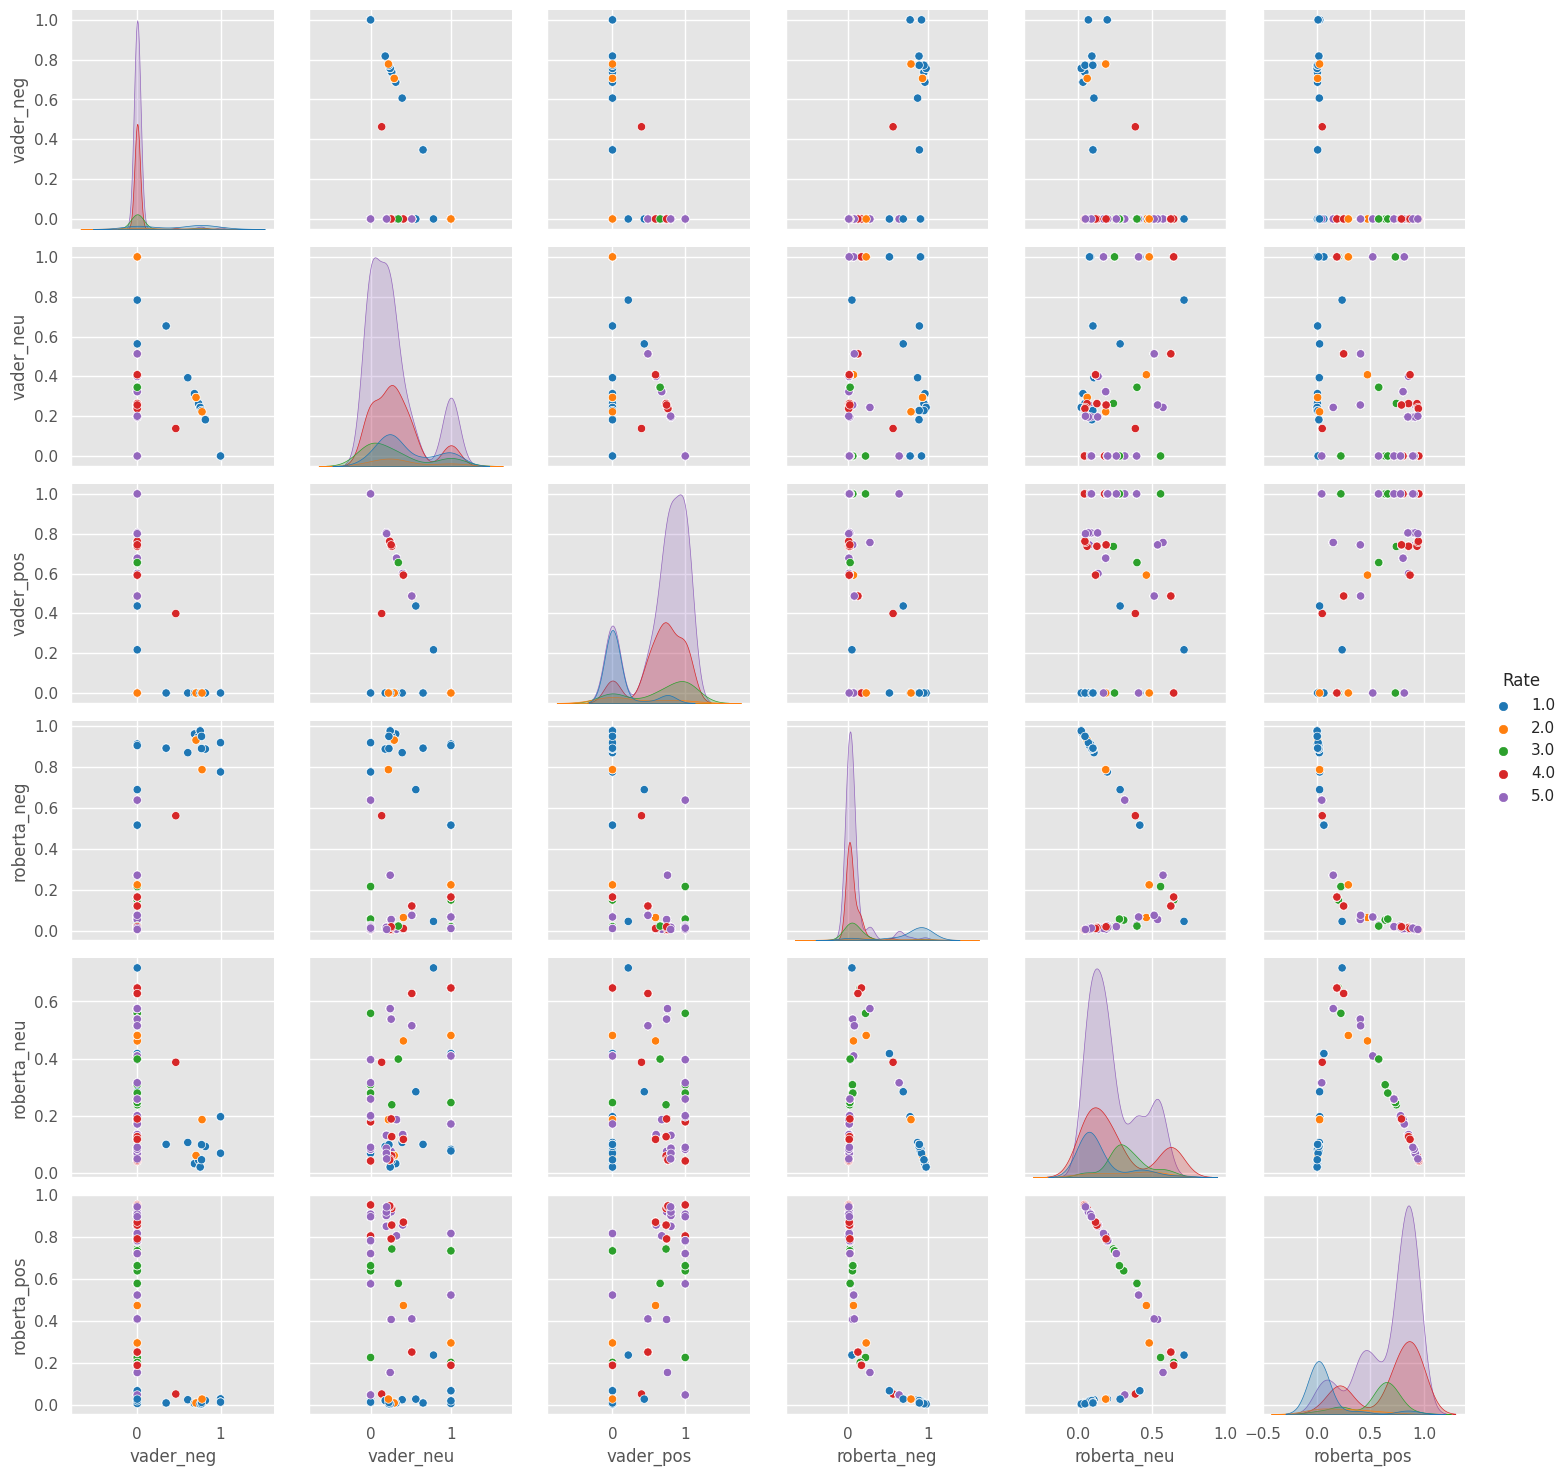

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Rate',
            palette='tab10')
plt.show()

# Step 4: Review Examples:

- Positive 1-Star and Negative 5-Star Reviews

Lets look at some examples where the model scoring and review score differ the most.

In [ ]:
results_df.query('Rate == 1') \
    .sort_values('roberta_pos', ascending=False)['Review'].values[0]

'absolute rubbish!'

In [ ]:
results_df.query('Rate == 1') \
    .sort_values('vader_pos', ascending=False)['Review'].values[0]

'absolute rubbish!'

# negative sentiment 5-Star view

In [ ]:
results_df.query('Rate == 5') \
    .sort_values('roberta_neg', ascending=False)['Review'].values[0]

'mind-blowing purchase'

In [ ]:
results_df.query('Rate == 5') \
    .sort_values('vader_neg', ascending=False)['Review'].values[0]

'highly recommended'

# Extra: The Transformers Pipeline
- Quick & easy way to run sentiment predictions

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [ ]:
sent_pipeline('Make sure to code everyday!')

[{'label': 'POSITIVE', 'score': 0.9991742968559265}]

In [ ]:
sent_pipeline('Smile')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]

#References

NLTK: https://www.nltk.org/

Sentimental Analysis: https://callminer.com/blog/sentiment-analysis-examples-best-practices?utm_campaign=search-us-nonbrand&utm_source=google&utm_medium=ppc&ad=652222676346&device=c&matchtype=p&utm_term=sentiment%20analysis&gad=1&gclid=Cj0KCQjw1OmoBhDXARIsAAAYGSGttzRqNYCH5WK7qlCuhxN_qrr2uM3T9tdZsMz0qf6VDSrv0ZD2WhQaApq-EALw_wcB

Datacamp: https://www.datacamp.com/tutorial/text-analytics-beginners-nltk?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720830&utm_adgroupid=143216588377&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=675429089986&utm_targetid=aud-438999696879:dsa-1947282172981&utm_loc_interest_ms=&utm_loc_physical_ms=1018127&utm_content=dsa~page~community-tuto&utm_campaign=230119_1-sea~dsa~tofu-tutorials_2-b2c_3-us_4-prc_5-na_6-na_7-le_8-pdsh-go_9-na_10-na_11-na-oct23odp&gclid=Cj0KCQjw1OmoBhDXARIsAAAYGSE0W53AetOUnZWbrw_ZSty4ndZmirTuM15IFaijrU0VtDOdSpW9VocaAoXcEALw_wcB
Textual Data Suite : https://www.marketplace.spglobal.com/en/datasets/bundle/textual-data-suite-(1000004)?cq_cmp=19585011118&cq_plac=&cq_net=g&cq_pos=&cq_plt=gp&utm_source=google&utm_medium=cpc&utm_campaign=Quantamental_Research_Search_Google&utm_term=nlp%20analysis&utm_content=666345875264&_bt=666345875264&_bk=nlp%20analysis&_bm=p&_bn=g&_bg=152231817315&gclid=Cj0KCQjw1OmoBhDXARIsAAAYGSFhuV57-i42XVhQ9vzYIbt91542tgr1je3yQOMxGfmlY3IVk-ELf08aAvLLEALw_wcB

Rule based sentiment Analysis : https://www.analyticsvidhya.com/blog/2021/06/rule-based-sentiment-analysis-in-python/

#Licence

MIT License

Copyright (c) 2023 Viral Jangale

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
